In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem import WordNetLemmatizer
!pip install -U gdown

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import gdown

file_id = '1ZWRo3sp-sCkUqdLLjEADc1n6JYdVD7Cq'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'data.csv', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1ZWRo3sp-sCkUqdLLjEADc1n6JYdVD7Cq
From (redirected): https://drive.google.com/uc?id=1ZWRo3sp-sCkUqdLLjEADc1n6JYdVD7Cq&confirm=t&uuid=611e4ff5-1b0a-48ed-b6d0-8691fa08f7c2
To: /content/data.csv
100%|██████████| 6.04G/6.04G [00:44<00:00, 137MB/s] 


'data.csv'

In [9]:


df = pd.read_csv("data.csv")
df.head()


/tmp/ipython-input-9-1424525216.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [16]:
df.describe()



,Complaint ID
count,9.609797e+06
mean,8.092744e+06
std,3.774842e+06
min,1.000000e+00
25%,5.038016e+06
50%,8.448508e+06
75%,1.129591e+07
max,1.423259e+07


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

/tmp/ipython-input-20-51479533.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')


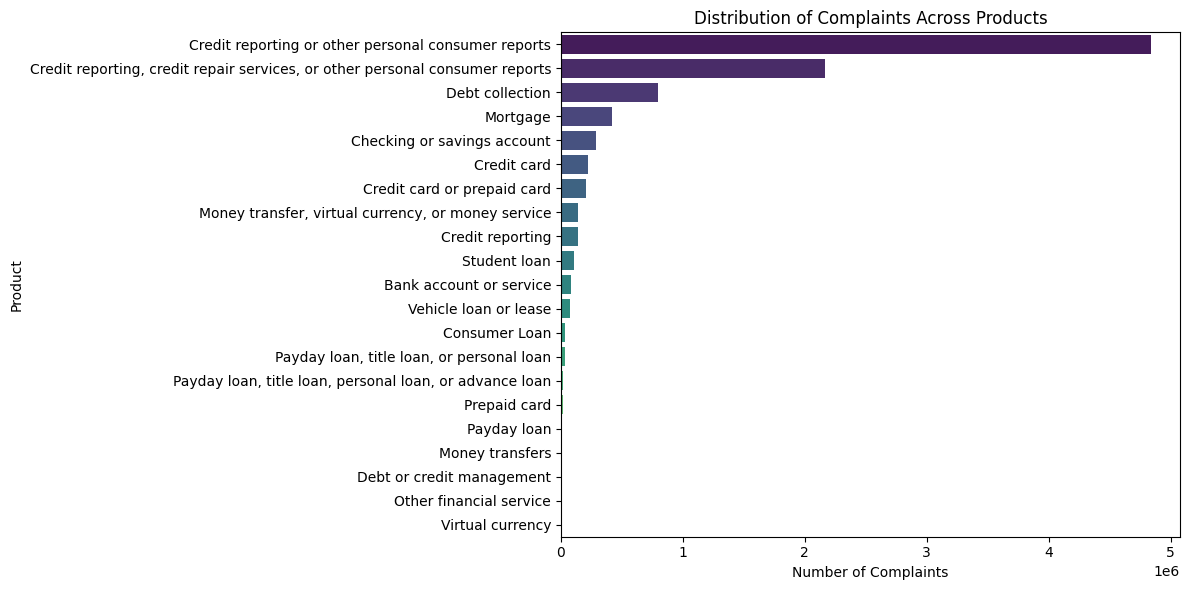

In [20]:
# Count complaints by product
product_counts = df['Product'].value_counts().sort_values(ascending=False)

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')
plt.title('Distribution of Complaints Across Products')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


In [21]:
# Fill NaNs with empty strings and calculate word count
df['narrative_length'] = df['Consumer complaint narrative'].fillna('').apply(lambda x: len(x.split()))

# Summary
df['narrative_length'].describe()


,narrative_length
count,9.609797e+06
mean,5.446667e+01
std,1.497672e+02
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,5.000000e+01
max,6.469000e+03


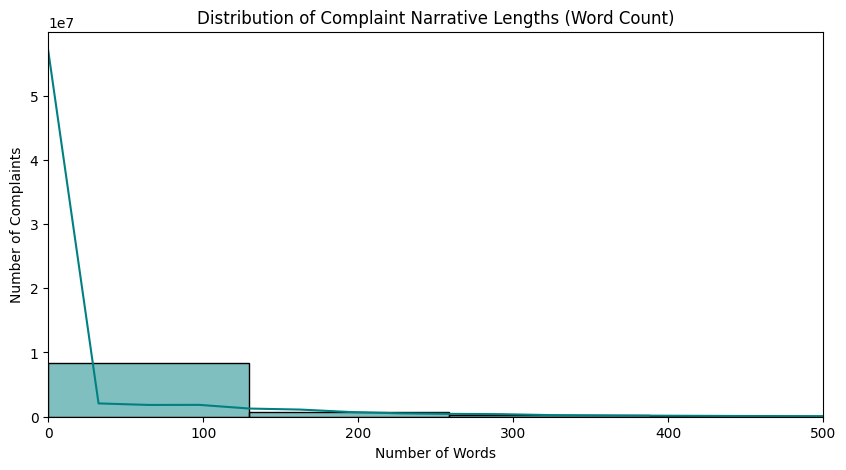

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df['narrative_length'], bins=50, kde=True, color='teal')
plt.title('Distribution of Complaint Narrative Lengths (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Complaints')
plt.xlim(0, 500)  # adjust to see details, can expand later
plt.show()


In [23]:
# Complaints with narrative
with_narrative = df['Consumer complaint narrative'].notna().sum()

# Complaints without narrative
without_narrative = df['Consumer complaint narrative'].isna().sum()

# Display
print(f"Complaints with narrative: {with_narrative}")
print(f"Complaints without narrative: {without_narrative}")


Complaints with narrative: 2980756
Complaints without narrative: 6629041


In [26]:
products = [
    'Credit card',
    'Personal loan',
    'Buy Now, Pay Later (BNPL)',
    'Savings account',
    'Money transfers'
]



In [27]:
filtered_df = df[df['Product'].isin(products)]
print(f"Records after filtering by product: {filtered_df.shape[0]}")

Records after filtering by product: 232040


In [28]:
# Remove rows where narrative is NaN or empty string (after trimming spaces)
filtered_df = filtered_df[filtered_df['Consumer complaint narrative'].notna()]
filtered_df = filtered_df[filtered_df['Consumer complaint narrative'].str.strip() != '']

print(f"Records after removing empty narratives: {filtered_df.shape[0]}")


Records after removing empty narratives: 82164


In [29]:
print(f"Original dataset size: {df.shape[0]}")
print(f"Filtered dataset size: {filtered_df.shape[0]}")


Original dataset size: 9609797
Filtered dataset size: 82164


In [30]:
filtered_df['clean_narrative'] = filtered_df['Consumer complaint narrative'].str.lower()


In [31]:


def clean_text(text):
    # Remove URLs (if any)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove boilerplate phrases you want to target (example below)
    boilerplate_phrases = [
        r'i am writing to file a complaint',
        r'this is to complain about',
        r'this letter is to complain',
        r'i want to report',
        r'please investigate',
        # add more phrases as you discover them
    ]
    for phrase in boilerplate_phrases:
        text = re.sub(phrase, '', text)
    # Remove special characters and digits, keep letters and spaces
    text = re.sub(r'[^a-z\s]', '', text)
    # Replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text).strip()
    return text

filtered_df['clean_narrative'] = filtered_df['clean_narrative'].apply(clean_text)


In [32]:

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

filtered_df['clean_narrative'] = filtered_df['clean_narrative'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

filtered_df['clean_narrative'] = filtered_df['clean_narrative'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [34]:
filtered_df[['Consumer complaint narrative', 'clean_narrative']].head(5)


,Consumer complaint narrative,clean_narrative
12237,A XXXX XXXX card was opened under my name by a...,xxxx xxxx card opened name fraudster received ...
13280,"Dear CFPB, I have a secured credit card with c...",dear cfpb secured credit card citibank changed...
13506,I have a Citi rewards cards. The credit balanc...,citi reward card credit balance issued recentl...
13955,b'I am writing to dispute the following charge...,bi writing dispute following charge citi credi...
14249,"Although the account had been deemed closed, I...",although account deemed closed continued make ...


In [ ]:
filtered_df.info()

In [35]:
# Save the cleaned dataframe to CSV
filtered_df.to_csv('cleaned_data.csv', index=False)


In [39]:
folder_path = '/content/drive/MyDrive/ColabData'
os.makedirs(folder_path, exist_ok=True)

In [40]:
save_path = '/content/drive/MyDrive/ColabData/cleaned_data.csv'
filtered_df.to_csv(save_path, index=False)
print(f"File saved to {save_path}")

File saved to /content/drive/MyDrive/ColabData/cleaned_data.csv
